# Simple Logistic Regression
## Created by John Webster on 09/29/2025

### Goal: The aim of this notebook is to create and implement a simple logistic regression model using Scikit-learn functionality to assess we can use age to predict whether or not someone makes over 50k annually in the dataset. Final thoughts on the model implementation will be detailed at the bottom of this notebook.

Please feel free to share your thoughts with me on this simple model implementation. I am always looking to improve and would greatly appreciate your feedback. Thank you for taking time to look at this notebook.

In [111]:
# Necessary imports to run this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

## About the data:

In [64]:
#import the data
adults = pd.DataFrame(pd.read_csv("adult11.csv"))

In [65]:
#Exploratory Analysis
adults.info() #15 columns in the data, no null values
adults.describe() #python recognizes 6 numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   gender          48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  salary          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [66]:
#Glance at the target variable we will be trying to predict
adults['salary'] #Binary outcome with 76% making under 50K and 24% making greater than 50k

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: salary, Length: 48842, dtype: object

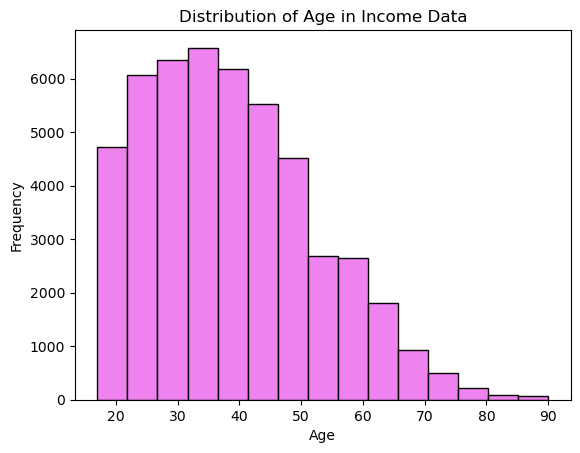

In [67]:
# Glance at our predictor variable to see its distribution
#create histogram
plt.hist(adults['age'], bins = 15, color = 'violet', edgecolor = 'black')

#Add labels and title
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age in Income Data")

#display
plt.show()

In [69]:
#Create Feature Data
feature = pd.DataFrame(adults['age'])

#Create target variable Series
target = pd.Series(adults['salary'])

In [70]:
# Create training and testing data
x_train, X_test, y_train, Y_test = train_test_split(feature, target, test_size=0.2, stratify=target, random_state=42)

In [71]:
#Scale the feature data with StandardScaler
SS = StandardScaler()
x_train = SS.fit_transform(x_train)
X_test = SS.transform(X_test)

In [72]:
#Label encode the target variable to turn it into 0's and 1's
LE = LabelEncoder()
y_train = LE.fit_transform(y_train)
Y_test = LE.transform(Y_test)

In [73]:
# Fit the logistic regression model
LR = LogisticRegression()
simplemodel = LR.fit(x_train, y_train)

## Test the Simple Logistic Regression Model

In [75]:
predictions = simplemodel.predict(X_test)
probabilities = simplemodel.predict_proba(X_test)

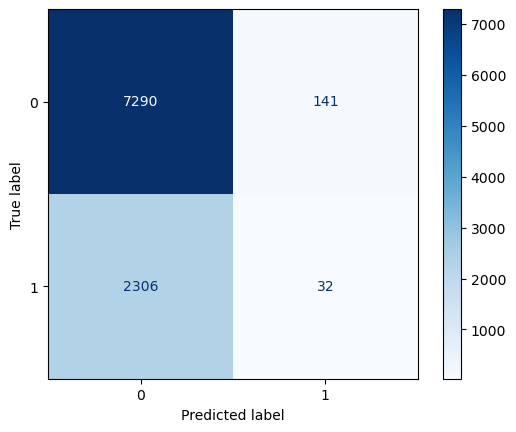

In [95]:
# Display results with Confusion Matrix
cmatr = ConfusionMatrixDisplay.from_estimator(simplemodel, X_test, Y_test, cmap='Blues')
plt.show()

In [107]:
#Summarize the model

#Precision - Proportion of true positives amongst total predicted positives.
print(precision_score(Y_test, predictions))
#Given the model predicted that someone made over 50k annually, 18% of those predictions actually did.

#Recall - Proportion of true positives amongst all actual positives.
print(recall_score(Y_test, predictions))
#Given someone truly made over 50k annually, the model will predict they make over 50k annually 1.3% of the time

#Accuracy - Proportion of correctly classified instances
print(accuracy_score(Y_test, predictions))
#If you were to ask the model to predict whether or not someone made greater than 50K annually, the model would predict correctly 75% of the time.

0.18497109826589594
0.013686911890504704
0.7495137680417647


## Thoughts on the model:
If you were to look at accuracy score alone, one would think that the model being correct 75% of the time in its predictions is not bad, but once we
take a look at precision and recall scores the model doesn't appear to do such a good job at correctly predicting those that DO make over 50k annually. 
In the beginning exploratory analysis we saw that there were far more instances of those that make under 50k annually so the model does a decent job at classifying those but due to the limited number of those that made over 50k annually I would suspect that is why the model poorly classifies those. For future consideration, I would say this model is not sufficient in using age alone to predict income group and I would propose adding other feature variables like education level, occupation, marital status, and potentially gender to investigate their roles in helping to more accurately classify individuals income group. 